In [2]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch
from scipy import stats
from adjustText import adjust_text
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adata = sc.read('annotated.h5ad')
adata.obs

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,low_label,low_score,_scvi_batch,_scvi_labels,overcluster,low_major,Cell_Type
711_AAACCCAAGTCGGGAT-1,711,Tumor,Right,707,707,6.562444,1396.0,7.242083,26.862464,10.100286,25.716331,0.000000,T follicular helper cells,0.103311,0,0,14,CD4+ T cells,CD4+ T Cells
711_AAACCCACAGAGGAAA-1,711,Tumor,Right,838,838,6.732211,1504.0,7.316548,23.803191,9.441490,13.962767,0.000000,Unknown,0.236022,0,0,11,CD4+ T cells,CD4+ T Cells
711_AAACCCACATGATAGA-1,711,Tumor,Right,435,435,6.077642,613.0,6.419995,17.781403,0.815661,18.270800,0.000000,Unknown,0.400460,0,0,36,CMS3,CMS3
711_AAACCCAGTCTCGCGA-1,711,Tumor,Right,579,579,6.363028,860.0,6.758094,23.255814,15.465117,6.395349,0.000000,Tip-like ECs,0.966648,0,0,28,Tip-like ECs,Tip-like ECs
711_AAACGAAGTTATCTTC-1,711,Tumor,Right,1384,1384,7.233455,2629.0,7.874739,19.246862,8.178015,15.405098,0.000000,gamma delta T cells,0.993837,0,0,15,CD8+ T cells,CD8+ T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706_TTTGGTTCAAACACCT-1,706,Tumor,Left,1815,1815,7.504392,4944.0,8.506132,21.318770,1.961974,21.318771,0.020227,CD8+ T cells,0.999997,0,0,1,CD8+ T cells,CD8+ T cells
706_TTTGGTTCAACGGGTA-1,706,Tumor,Left,909,909,6.813445,3528.0,8.168770,34.722222,0.368481,25.368483,0.000000,Pro-inflammatory,0.549964,0,0,12,SPP1+,Spp1+
706_TTTGGTTTCTATCGCC-1,706,Tumor,Left,4658,4658,8.446556,23600.0,10.069044,17.559322,3.237288,18.135593,0.004237,Stromal 2,0.961222,0,0,25,Stromal 2,Stromal 2
706_TTTGTTGCATCAGCGC-1,706,Tumor,Left,374,374,5.926926,686.0,6.532334,23.032070,10.932944,33.236153,0.000000,CMS2,0.978673,0,0,10,CMS2,CMS2


In [4]:
model = scvi.model.SCVI.load('the_model/', adata)
model

INFO     File the_model/model.pt already downloaded                                                                


SCVI model with the following parameters: 
n_hidden: 256, n_latent: 60, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [4]:
cell_types = adata.obs['Cell_Type'].unique()
cell_types

['CD4+ T Cells', 'CMS3', 'Tip-like ECs', 'CD8+ T cells', 'B Cells', ..., 'Plasma Cells', 'Stromal 3', 'Plasmacytoid Dendritic Cells', 'Follicular helper T cells', 'Enteric glia cells']
Length: 21
Categories (21, object): ['B Cells', 'CD4+ T Cells', 'CD8+ T cells', 'CMS2', ..., 'Spp1+', 'Stromal 2', 'Stromal 3', 'Tip-like ECs']

In [5]:
subset = adata[adata.obs['Cell_Type'].isin(['Stromal 3'])].copy()
subset

AnnData object with n_obs × n_vars = 65 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:


 scvi_de = model.differential_expression(
     idx1 = [(adata.obs['Cell_Type'].isin(['Stromal 3'])) & (adata.obs.condition == 'Tumor')],
     idx2 = [(adata.obs['Cell_Type'].isin(['Stromal 3'])) & (adata.obs.condition == 'Normal')],
     delta=0.5,  # minimum log fold change threshold
     fdr_target=0.05,
     mode='change',
     pseudocounts=1e-7,
     test_mode='two'     
     )
scvi_de

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
SEPHS2,1.0000,0.0000,18.420681,1.230770e-06,3.483903e-05,1.000000e-07,0.5,-4.996382,-5.084017,0.978003,-7.572529,-2.358029,0.000000,0.045568,0.000000,0.095238,0.000000,0.363421,True
IGLV1-40,1.0000,0.0000,18.420681,4.343842e-08,2.222414e-06,1.000000e-07,0.5,-5.351477,-5.405994,1.250685,-8.814478,-1.596582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
TRBV19,1.0000,0.0000,18.420681,8.969383e-08,4.916556e-06,1.000000e-07,0.5,-5.327645,-5.215968,1.346450,-10.996944,-1.367380,0.000000,0.021552,0.000000,0.047619,0.000000,0.172942,True
ZC3H11A,1.0000,0.0000,18.420681,1.643238e-04,1.536867e-05,1.000000e-07,0.5,3.363796,3.396121,0.871437,0.692776,5.633166,0.235842,0.053588,0.478261,0.095238,2.055120,0.461923,True
TRBV12-3,1.0000,0.0000,18.420681,2.158793e-08,2.366771e-06,1.000000e-07,0.5,-6.400783,-6.332994,1.302314,-12.211224,-2.538021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SERBP1,0.1364,0.8636,-1.845518,2.057207e-04,2.110215e-04,1.000000e-07,0.5,-0.041221,-0.031689,0.334496,-1.218081,0.950706,0.170004,0.408876,0.478261,0.642857,1.231906,3.458464,False
SNRPD3,0.1290,0.8710,-1.909830,1.465512e-04,1.579454e-04,1.000000e-07,0.5,-0.096112,-0.108396,0.316763,-1.079318,1.024178,0.317526,0.360036,0.478261,0.523810,3.227185,2.986941,False
TRMT112,0.1228,0.8772,-1.966178,2.369693e-04,2.355686e-04,1.000000e-07,0.5,0.023473,0.004769,0.332157,-0.887240,1.552682,0.308389,0.342842,0.478261,0.571429,2.635505,2.907240,False
PDCD6,0.1132,0.8868,-2.058463,1.354748e-04,1.482285e-04,1.000000e-07,0.5,-0.125478,-0.127290,0.289226,-1.057551,0.889982,0.282261,0.293849,0.478261,0.523810,2.471390,2.486137,False


In [7]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
MTRNR2L12,1.0000,0.0000,18.420681,5.298970e-06,1.198205e-02,1.000000e-07,0.5,-11.346895,-11.336309,1.329240,-15.656074,-7.307416,0.000000,3.000255,0.000000,1.000000,0.000000,25.811899,True
MTRNR2L8,1.0000,0.0000,18.420681,2.621346e-06,3.541443e-03,1.000000e-07,0.5,-8.168531,-7.495555,2.628219,-16.151545,-3.128768,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True
AC007952.4,1.0000,0.0000,18.420681,1.858595e-07,5.109846e-05,1.000000e-07,0.5,-8.072402,-8.081122,1.268358,-13.148342,-3.581409,0.000000,0.031305,0.000000,0.071429,0.000000,0.247966,True
HLA-DRB5,0.9998,0.0002,8.516943,4.716414e-07,7.661209e-05,1.000000e-07,0.5,-8.040002,-8.399881,2.445826,-14.644199,0.077898,0.000000,0.062422,0.000000,0.142857,0.000000,0.499214,True
GSTM1,1.0000,0.0000,18.420681,3.058306e-07,1.179890e-04,1.000000e-07,0.5,-8.036159,-8.426534,1.719288,-11.310276,-1.975754,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REG1A,0.9770,0.0230,3.748992,1.365101e-05,7.485187e-07,1.000000e-07,0.5,4.422256,4.564114,2.486787,-7.238344,12.665584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
PDE4C,0.9744,0.0256,3.639229,6.820108e-06,3.007747e-07,1.000000e-07,0.5,4.452817,4.577896,2.000742,-2.437429,11.198833,0.015466,0.000000,0.086957,0.000000,0.113008,0.000000,True
ABCF2,1.0000,0.0000,18.420681,2.241678e-05,1.214418e-06,1.000000e-07,0.5,4.510210,4.651817,1.071576,1.444962,7.590075,0.015129,0.000000,0.086957,0.000000,0.104258,0.000000,True
ATXN7,0.9984,0.0016,6.436144,3.168132e-05,1.363789e-06,1.000000e-07,0.5,4.671696,4.672514,1.468107,-0.479183,8.866927,0.048620,0.000000,0.217391,0.000000,0.340312,0.000000,True


In [8]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df
genes_to_show

['BACE1-AS',
 'ZHX1-C8orf76',
 'C11orf96',
 'U2AF1',
 'AC004556.1',
 'AC133644.2',
 'AC007325.4',
 'GREM1',
 'TWIST1',
 'PSMA2',
 'NICN1',
 'AC245100.1',
 'DIABLO',
 'POLR2J3',
 'IGHA1',
 'F8A1',
 'ADAMTS6',
 'POU3F1',
 'MPRIP-AS1',
 'RPA4',
 'REG1A',
 'PDE4C',
 'ABCF2',
 'ATXN7',
 'PRR4',
 'MTRNR2L12',
 'MTRNR2L8',
 'HLA-DRB5',
 'AC007952.4',
 'GSTM1',
 'OVCA2',
 'ATP6V0C',
 'PTPRCAP',
 'MIA2',
 'TEN1',
 'TRBV20-1',
 'TRBV7-9',
 'IGHV5-78',
 'TRBV12-3',
 'IGKV1-17',
 'TNFSF13',
 'TRBV6-6',
 'TRBV5-4',
 'TRAV9-2',
 'DBNDD2',
 'TRBV3-1',
 'SLC9A3',
 'TRAV26-2',
 'TRBV4-2',
 'TRBV5-1']

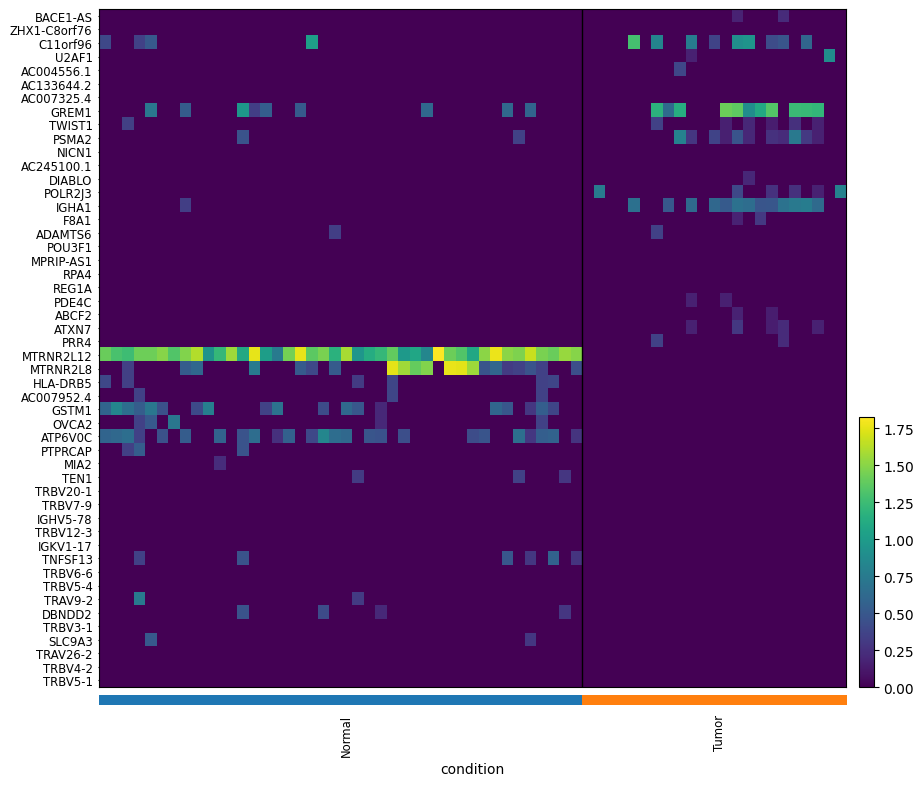

In [12]:
sc.pl.heatmap(subset, genes_to_show, groupby='condition', swap_axes=True, 
              log = True)

In [8]:
scvi_de1 = scvi_de.copy()
scvi_de1 = scvi_de1[(scvi_de1.raw_normalized_mean1 > .5) | (scvi_de1.raw_normalized_mean2 > .5)]
scvi_de1

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
MTRNR2L12,1.0000,0.0000,18.420681,5.298970e-06,0.011982,1.000000e-07,0.5,-11.346895,-11.336309,1.329240,-15.656074,-7.307416,0.000000,3.000255,0.000000,1.000000,0.000000,25.811899,True
MTRNR2L8,1.0000,0.0000,18.420681,2.621346e-06,0.003541,1.000000e-07,0.5,-8.168531,-7.495555,2.628219,-16.151545,-3.128768,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True
GSTM1,1.0000,0.0000,18.420681,3.058306e-07,0.000118,1.000000e-07,0.5,-8.036159,-8.426534,1.719288,-11.310276,-1.975754,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True
OVCA2,1.0000,0.0000,18.420681,1.286573e-07,0.000033,1.000000e-07,0.5,-7.944697,-7.968360,0.764439,-10.260099,-5.563108,0.000000,0.066750,0.000000,0.119048,0.000000,0.552124,True
ATP6V0C,1.0000,0.0000,18.420681,1.275137e-06,0.000315,1.000000e-07,0.5,-7.917219,-7.962872,0.665490,-9.710693,-5.760024,0.000000,0.409076,0.000000,0.595238,0.000000,3.306655,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U2AF1,1.0000,0.0000,18.420681,2.909656e-05,0.000003,1.000000e-07,0.5,3.583718,3.428407,1.145384,0.523323,7.489403,0.070571,0.000000,0.086957,0.000000,0.804596,0.000000,True
PSMA2,0.9996,0.0004,7.823621,1.516239e-04,0.000014,1.000000e-07,0.5,3.798982,3.712039,1.379833,-0.139734,7.679668,0.225912,0.024273,0.478261,0.047619,1.750837,0.189707,True
GREM1,0.9898,0.0102,4.575114,3.089775e-04,0.000023,1.000000e-07,0.5,3.821754,3.800896,1.589285,-1.170748,10.058331,1.078102,0.183441,0.478261,0.214286,8.185534,1.604508,True
POLR2J3,1.0000,0.0000,18.420681,7.045290e-05,0.000005,1.000000e-07,0.5,4.053535,3.861474,1.182920,0.994112,7.838174,0.157708,0.000000,0.260870,0.000000,1.465346,0.000000,True


In [9]:
genes_to_show1 = scvi_de1[-25:].index.tolist() + scvi_de1[:25].index.tolist() #top 25 and bottom 25 from sorted df

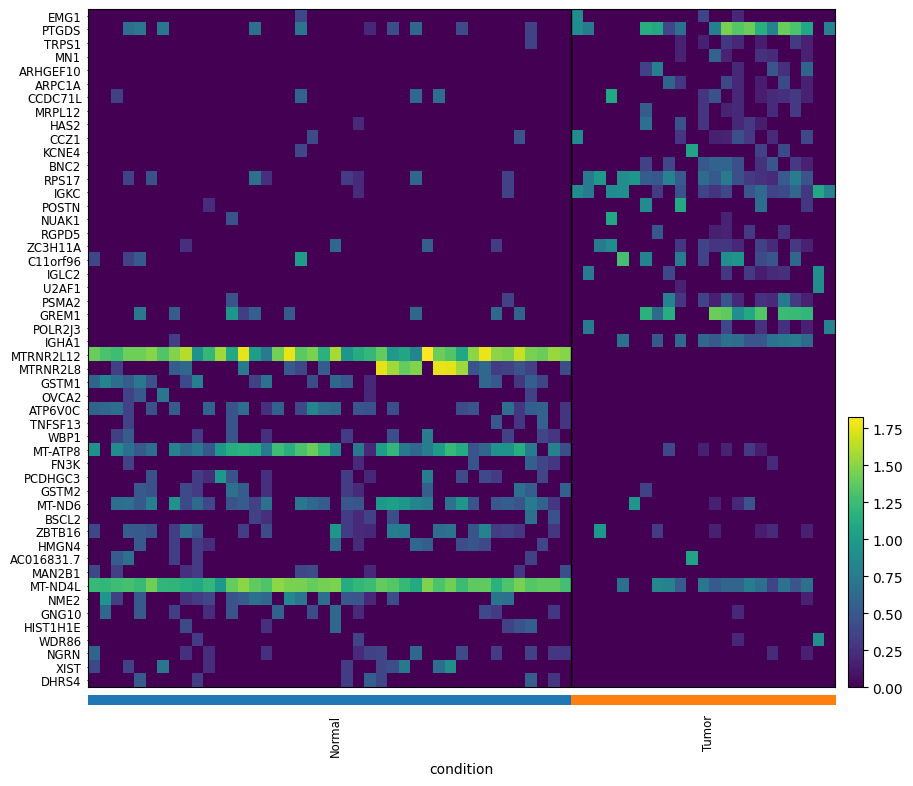

In [10]:
sc.pl.heatmap(subset, genes_to_show1, groupby='condition', swap_axes=True, 
              log = True)

In [18]:
upregulated = scvi_de1[scvi_de1['lfc_mean'] > 0].index.tolist()
upregulated

['DYNC1I2',
 'DNAJC21',
 'STK24',
 'CDC42',
 'SEC22B',
 'CBX3',
 'AES',
 'DCTN5',
 'WAC',
 'BLOC1S6',
 'HDGF',
 'ARHGAP1',
 'MYSM1',
 'SPRED2',
 'IL10RB',
 'MAN1A1',
 'KHSRP',
 'GNAS',
 'HNRNPD',
 'SPPL3',
 'LIMS1',
 'DICER1',
 'GFPT1',
 'WDR82',
 'UBE2R2',
 'ESYT2',
 'AEBP2',
 'PDS5B',
 'DAB2',
 'TEX261',
 'HNRNPH2',
 'NAP1L1',
 'ATM',
 'SET',
 'GALNT10',
 'PURA',
 'URI1',
 'KLF13',
 'PPP1CB',
 'SLC35E2B',
 'LARP1',
 'MXD4',
 'TRIM56',
 'IGF2R',
 'SEC22A',
 'NPLOC4',
 'UBE2K',
 'SPIN1',
 'IMPAD1',
 'UBE2Q1',
 'GATAD2A',
 'FMR1',
 'ZMAT3',
 'LMO4',
 'AHCYL1',
 'KIAA2026',
 'CDYL',
 'CTNNB1',
 'NFAT5',
 'PAFAH1B2',
 'ACVR2A',
 'ST6GALNAC6',
 'PPP2R5C',
 'SFT2D2',
 'PPP1R35',
 'CAPZA1',
 'MUM1',
 'AP1AR',
 'NDUFA11',
 'ABHD17A',
 'HEATR5A',
 'TAOK1',
 'SLC25A37',
 'TIMP2',
 'ACVR1',
 'CDC42EP5',
 'ARHGAP5',
 'PTEN',
 'MT-ND2',
 'TBC1D10B',
 'CLN5',
 'RFX1',
 'UBXN7',
 'ZBTB7A',
 'KLHL42',
 'ZBTB41',
 'CHURC1',
 'SOS1',
 'SSBP3',
 'ZBED6',
 'CTDNEP1',
 'CMIP',
 'DNM3OS',
 'RHOQ',
 'SYNGAP

In [24]:
downregulated = scvi_de[scvi_de['lfc_mean'] < 0].index.tolist()
downregulated

['MTRNR2L12',
 'MTRNR2L8',
 'AC007952.4',
 'HLA-DRB5',
 'GSTM1',
 'OVCA2',
 'ATP6V0C',
 'PTPRCAP',
 'MIA2',
 'TEN1',
 'TRBV20-1',
 'TRBV7-9',
 'IGHV5-78',
 'TRBV12-3',
 'IGKV1-17',
 'TRBV6-6',
 'TNFSF13',
 'TRBV5-4',
 'TRAV9-2',
 'DBNDD2',
 'TRBV3-1',
 'SLC9A3',
 'TRBV4-2',
 'TRAV26-2',
 'TRBV5-1',
 'IGKV3-20',
 'TRBV6-5',
 'PDF',
 'LIME1',
 'ZGPAT',
 'TRBV7-2',
 'TRBV29-1',
 'IGHV5-51',
 'GPR25',
 'CCL24',
 'TREX1',
 'TRBV6-2',
 'IGKV3-11',
 'P2RY12',
 'IGLV1-40',
 'TRBV7-6',
 'TRBV19',
 'DPH1',
 'AC124312.1',
 'TRBV2',
 'TRBV6-1',
 'IGKV3-15',
 'ATRIP',
 'TRAV29DV5',
 'TRAV8-4',
 'TRBV9',
 'EDC4',
 'IGHV1-2',
 'TRBV10-3',
 'TRBV5-6',
 'TRAV1-2',
 'TRBV12-5',
 'TRBV24-1',
 'TRBV11-2',
 'TRBV12-4',
 'IGKV1-5',
 'TRBV27',
 'MRPS24',
 'SEPHS2',
 'TRBV30',
 'TRBV18',
 'GET4',
 'TRAV8-6',
 'TRAV14DV4',
 'IGKV1-16',
 'WBP1',
 'FKBP1C',
 'TRAV8-1',
 'TRAV12-1',
 'TRBV21-1',
 'TRBV4-1',
 'TRAV26-1',
 'TRAV35',
 'TRAV13-1',
 'ELL3',
 'BCKDHA',
 'TRDV1',
 'AL645728.1',
 'MT-ATP8',
 'IGKV1-6',
 

In [11]:
import gseapy as gp #this method requires internet connection

In [22]:
print(f"gseapy: {gp.__version__}")

gseapy: 1.1.10


In [12]:
enr = gp.enrichr(gene_list= scvi_de[scvi_de['lfc_mean'] > 0].index.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2023'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [13]:
enr.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Hippo signaling pathway,1.944816e-07,0.000056,0,0,3.689804,57.018280,YAP1;BMPR2;WWC1;PARD6G;SAV1;GLI2;PPP1CB;PPP2CB...
1,KEGG_2021_Human,Wnt signaling pathway,3.104858e-05,0.002674,0,0,2.969358,30.821806,TLE4;FZD1;FZD2;MMP7;RYK;CSNK2A2;WNT5A;AXIN1;FZ...
2,KEGG_2021_Human,Signaling pathways regulating pluripotency of ...,3.598255e-05,0.002674,0,0,3.250733,33.263051,ACVR1;FZD1;FZD2;BMPR2;WNT5A;LIF;AXIN1;FZD8;PIK...
3,KEGG_2021_Human,MAPK signaling pathway,3.700458e-05,0.002674,0,0,2.330517,23.781687,CACNA1C;NLK;FGF2;RASGRP1;ELK4;CDC42;RPS6KA3;MA...
4,KEGG_2021_Human,Pathways in cancer,8.574348e-05,0.004956,0,0,1.895980,17.754241,CXCL8;PTEN;GLI1;FGF2;GLI2;CASP3;EP300;PRKACA;I...
...,...,...,...,...,...,...,...,...,...
3493,GO_Biological_Process_2023,Calcium Ion Transport (GO:0006816),9.947012e-01,0.995808,0,0,0.186669,0.000992,CACNA1C
3494,GO_Biological_Process_2023,Membrane Organization (GO:0061024),9.952077e-01,0.995808,0,0,0.314744,0.001512,CTDNEP1;CLN3;CHMP4A
3495,GO_Biological_Process_2023,Ribosome Biogenesis (GO:0042254),9.954534e-01,0.995808,0,0,0.312520,0.001424,RPS17;EMG1;RRP36
3496,GO_Biological_Process_2023,Intracellular Protein Transport (GO:0006886),9.954976e-01,0.995808,0,0,0.470253,0.002122,ARL4C;RAB21;STX16;NUP50;RAB23;COPZ2;TMED7;STX2...


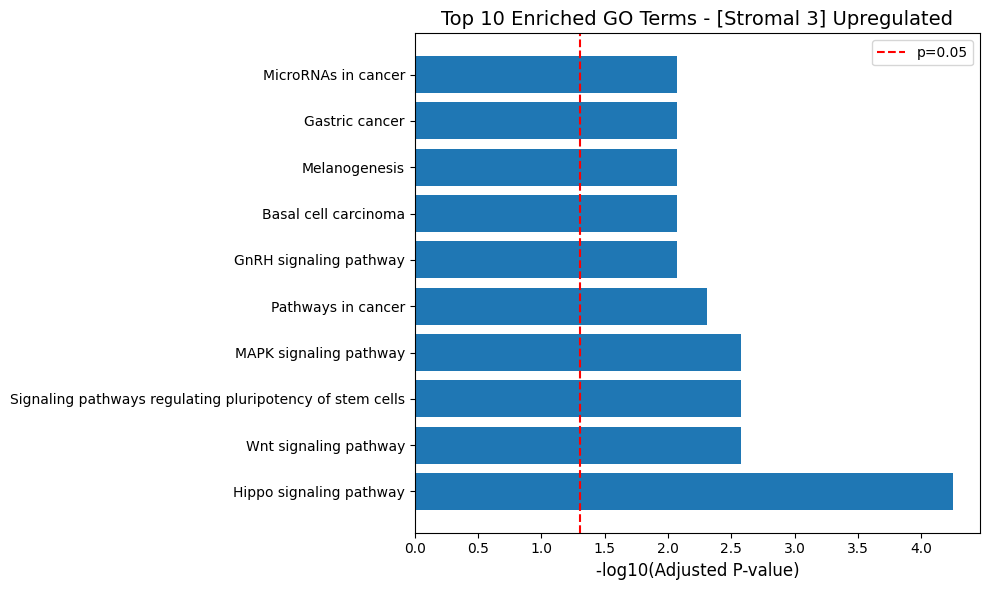

In [14]:

#bar plot
# Select top 10 terms by adjusted p-value
top_n = 10
top_terms = enr.results.head(top_n).copy()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sort by adjusted p-value (ascending)
top_terms = top_terms.sort_values('Adjusted P-value', ascending=True)

# Create bars
y_pos = np.arange(len(top_terms))
bars = ax.barh(y_pos, -np.log10(top_terms['Adjusted P-value']))

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(top_terms['Term'], fontsize=10)
ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12)
ax.set_title('Top 10 Enriched GO Terms - [Stromal 3] Upregulated', fontsize=14)
ax.axvline(x=-np.log10(0.05), color='red', linestyle='--', label='p=0.05')
ax.legend()

plt.tight_layout()
plt.savefig('enrichment_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
print(enr.results.columns.tolist())

['Gene_set', 'Term', 'P-value', 'Adjusted P-value', 'Old P-value', 'Old adjusted P-value', 'Odds Ratio', 'Combined Score', 'Genes']


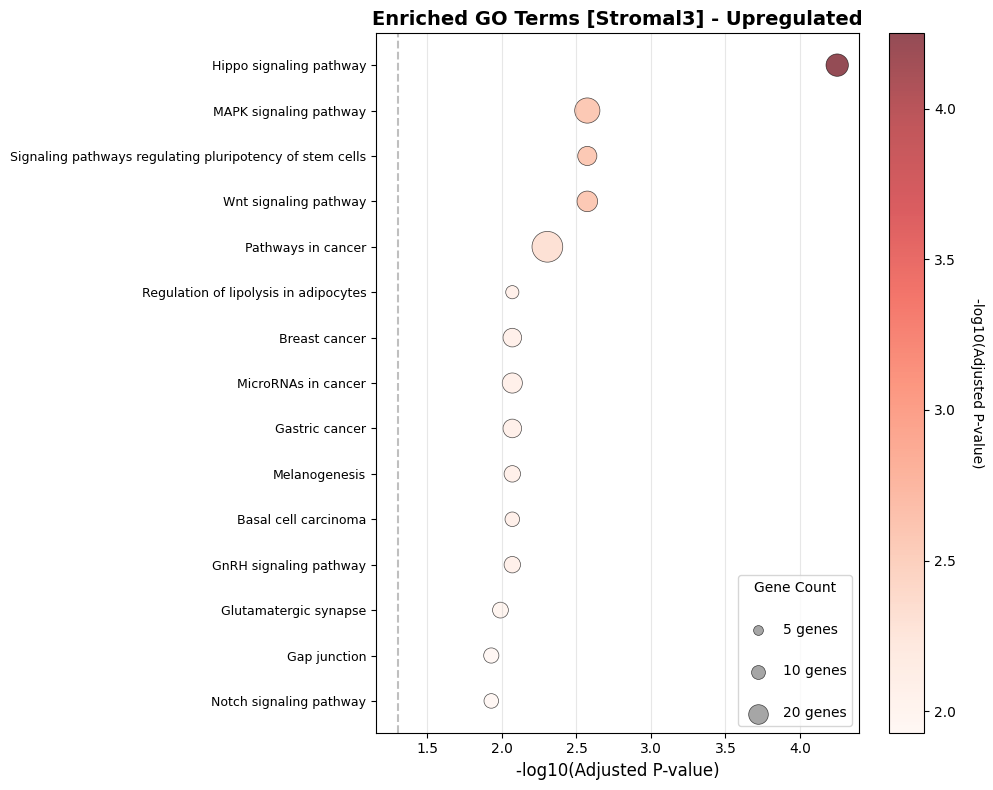

In [15]:

#Dot plot
import matplotlib.pyplot as plt
import numpy as np

# Select top terms
top_n = 15
top_terms = enr.results.head(top_n).copy()
top_terms = top_terms.sort_values('Adjusted P-value', ascending=False)

# Create dot plot
fig, ax = plt.subplots(figsize=(10, 8))

# Extract data
terms = top_terms['Term']
pvals = -np.log10(top_terms['Adjusted P-value'])
gene_counts = top_terms['Genes'].str.split(';').str.len()  # Count genes separated by semicolon

# Create scatter
scatter = ax.scatter(pvals, np.arange(len(terms)), 
                     s=gene_counts*10,  # Size by number of genes
                     c=pvals,  # Color by p-value
                     cmap='Reds', 
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

# Customize
ax.set_yticks(np.arange(len(terms)))
ax.set_yticklabels(terms, fontsize=9)
ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12)
ax.set_title('Enriched GO Terms [Stromal3] - Upregulated', fontsize=14, fontweight='bold')
ax.axvline(x=-np.log10(0.05), color='gray', linestyle='--', alpha=0.5)
ax.grid(axis='x', alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('-log10(Adjusted P-value)', rotation=270, labelpad=20)

# Add legend for size
sizes_to_show = [5, 10, 20]
for size in sizes_to_show:
    ax.scatter([], [], s=size*10, c='gray', alpha=0.7, 
               edgecolors='black', linewidth=0.5,
               label=f'{size} genes')
ax.legend(scatterpoints=1, frameon=True, labelspacing=2, 
          title='Gene Count', loc='lower right')

plt.tight_layout()
plt.savefig('enrichment_dotplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
from gseapy import barplot, dotplot

# Bar plot
barplot(enr.results, 
        title='GO Enrichment - [Stromal 3] Upregulated',
        cutoff=0.05,
        top_term=15,
        figsize=(8, 6),
        ofname='gseapy_barplot.png')

# Dot plot
dotplot(enr.results,
        title='GO Enrichment - [Stromal 3] Upregulated', 
        cutoff=0.05,
        top_term=15,
        figsize=(6, 8),
        ofname='gseapy_dotplot.png')

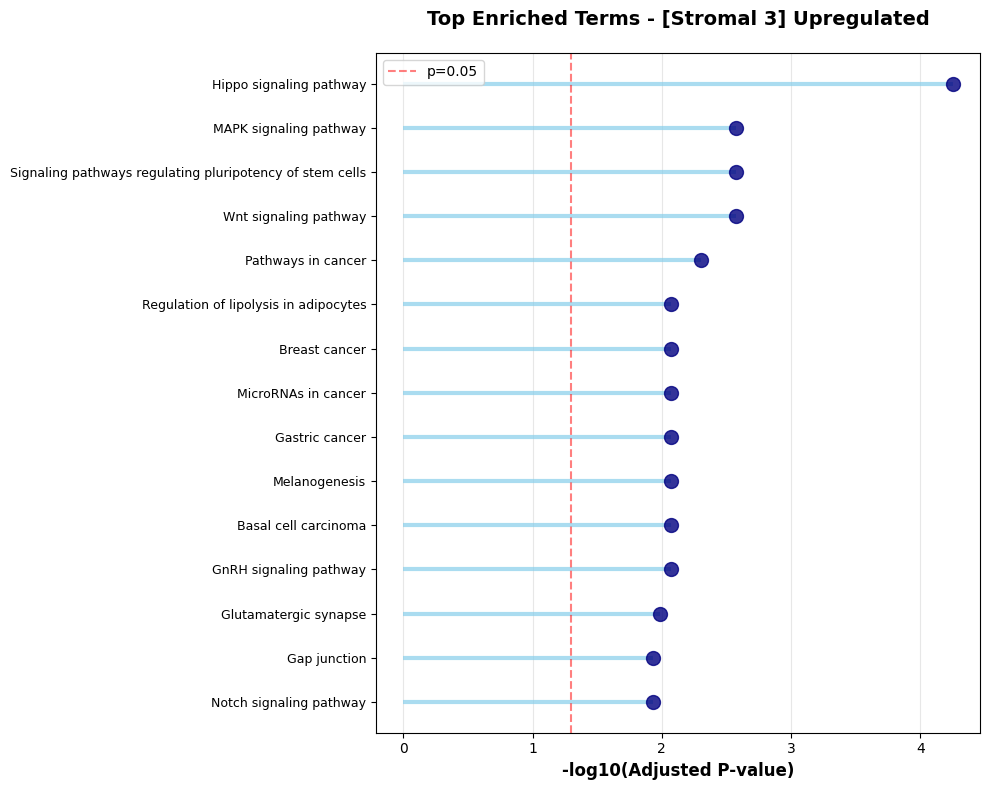

In [21]:
# Select top terms
top_n = 15
top_terms = enr.results.head(top_n).copy()
top_terms = top_terms.sort_values('Adjusted P-value', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Data
y_pos = np.arange(len(top_terms))
pvals = -np.log10(top_terms['Adjusted P-value'])

# Create lollipop
ax.hlines(y=y_pos, xmin=0, xmax=pvals, color='skyblue', alpha=0.7, linewidth=3)
ax.plot(pvals, y_pos, "o", markersize=10, color='navy', alpha=0.8)

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(top_terms['Term'], fontsize=9)
ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12, fontweight='bold')
ax.set_title('Top Enriched Terms - [Stromal 3] Upregulated', 
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=-np.log10(0.05), color='red', linestyle='--', 
           label='p=0.05', alpha=0.5)
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('enrichment_lollipop.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
enr.results.to_csv('Stromal3_up_GO_enrichment.csv', index=False)

### Downreg

In [18]:
enr_down = gp.enrichr(gene_list= scvi_de[scvi_de['lfc_mean'] < 0].index.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2023'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )
enr_down

In [20]:
enr_down.results.to_csv('Stromal3_Down_GO_enrichment.csv', index=False)

In [23]:
enr_down.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Linoleic acid metabolism,0.071339,0.999802,0,0,5.251183,1.386475e+01,ALOX15;PLB1
1,KEGG_2021_Human,Pentose phosphate pathway,0.079534,0.999802,0,0,3.224791,8.163792e+00,GPI;IDNK;RBKS
2,KEGG_2021_Human,Spliceosome,0.086689,0.999802,0,0,1.749887,4.279222e+00,U2AF1L5;SF3B2;SF3A2;PHF5A;PUF60;DHX16;SNRPC;SN...
3,KEGG_2021_Human,Intestinal immune network for IgA production,0.090272,0.999802,0,0,2.490688,5.989913e+00,HLA-DRB5;TNFSF13;MADCAM1;HLA-DQA2
4,KEGG_2021_Human,RNA polymerase,0.112411,0.999802,0,0,2.727881,5.962034e+00,POLR3C;POLR3D;POLR2E
...,...,...,...,...,...,...,...,...,...
2026,GO_Biological_Process_2023,Phosphorylation (GO:0016310),0.999981,0.999994,0,0,0.181875,3.501295e-06,GNPTG;GPI;CDK3
2027,GO_Biological_Process_2023,Regulation Of Transcription By RNA Polymerase ...,0.999981,0.999994,0,0,0.514108,9.653150e-06,SMARCB1;SRCAP;LIN37;ZNF20;AATF;PAGR1;MYDGF;ZNF...
2028,GO_Biological_Process_2023,Regulation Of Gene Expression (GO:0010468),0.999991,0.999994,0,0,0.363207,3.301646e-06,GPI;ZNF460;SRCAP;CD3E;MT3;LGALS9B;PQBP1;ZNF718...
2029,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,0.999994,0.999994,0,0,0.417540,2.457168e-06,GPI;SMARCB1;SRCAP;GPATCH3;PHB2;PQBP1;HSF1;ZNF4...


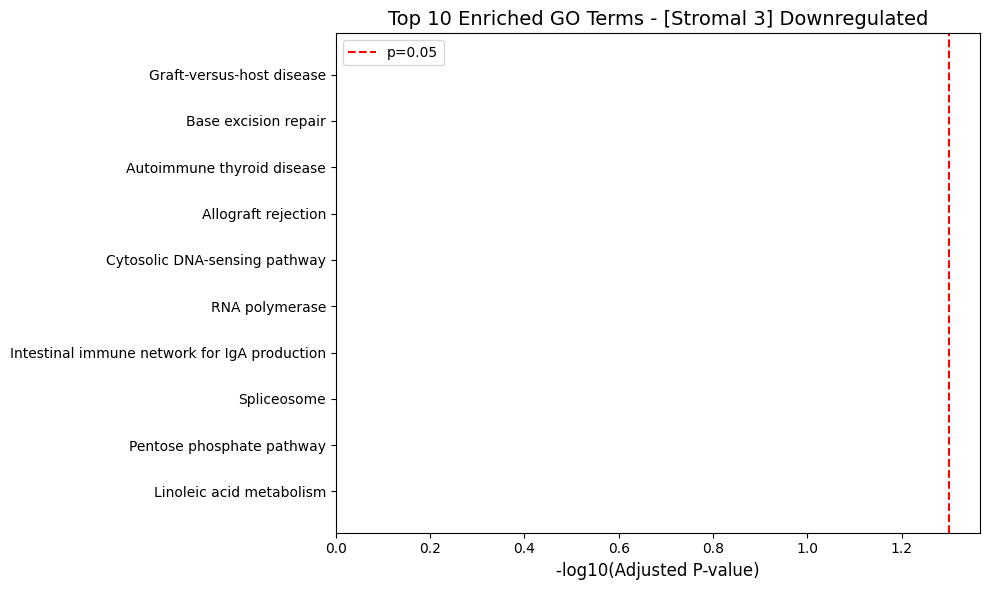

In [25]:

#bar plot
# Select top 10 terms by adjusted p-value
top_n = 10
top_terms = enr_down.results.head(top_n).copy()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sort by adjusted p-value (ascending)
top_terms = top_terms.sort_values('Adjusted P-value', ascending=True)

# Create bars
y_pos = np.arange(len(top_terms))
bars = ax.barh(y_pos, -np.log10(top_terms['Adjusted P-value']))

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(top_terms['Term'], fontsize=10)
ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12)
ax.set_title('Top 10 Enriched GO Terms - [Stromal 3] Downregulated', fontsize=14)
ax.axvline(x=-np.log10(0.05), color='red', linestyle='--', label='p=0.05')
ax.legend()

plt.tight_layout()
plt.savefig('enrichment_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

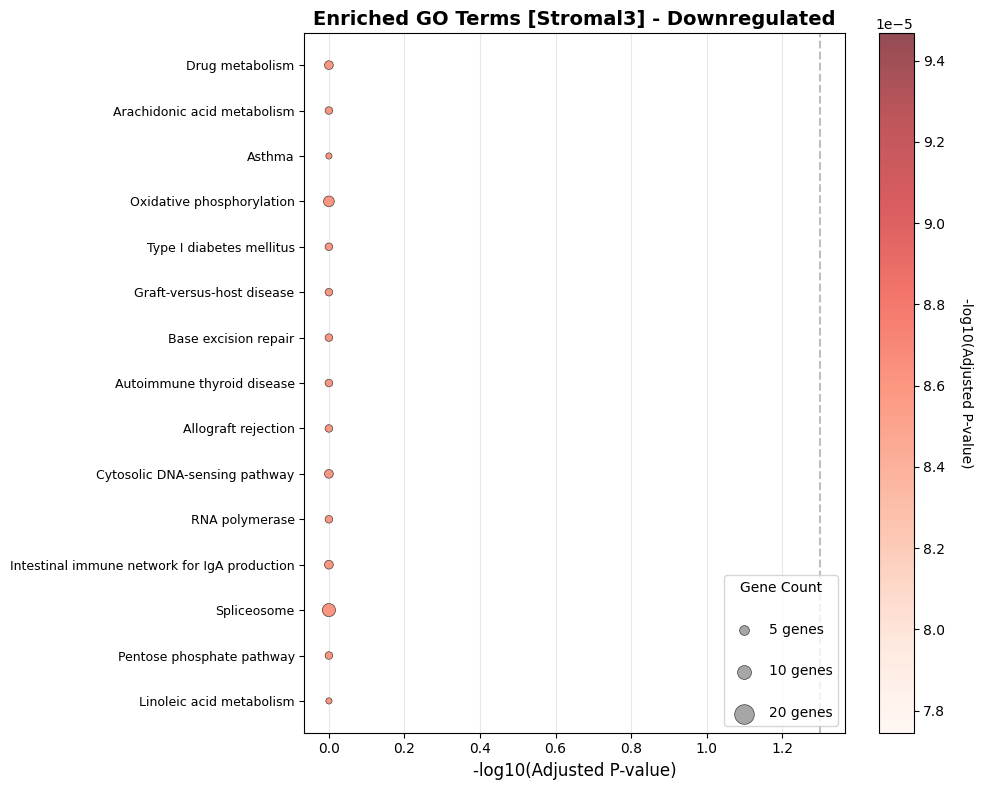

In [26]:
#Dot plot

# Select top terms
top_n = 15
top_terms = enr_down.results.head(top_n).copy()
top_terms = top_terms.sort_values('Adjusted P-value', ascending=False)

# Create dot plot
fig, ax = plt.subplots(figsize=(10, 8))

# Extract data
terms = top_terms['Term']
pvals = -np.log10(top_terms['Adjusted P-value'])
gene_counts = top_terms['Genes'].str.split(';').str.len()  # Count genes separated by semicolon

# Create scatter
scatter = ax.scatter(pvals, np.arange(len(terms)), 
                     s=gene_counts*10,  # Size by number of genes
                     c=pvals,  # Color by p-value
                     cmap='Reds', 
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

# Customize
ax.set_yticks(np.arange(len(terms)))
ax.set_yticklabels(terms, fontsize=9)
ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12)
ax.set_title('Enriched GO Terms [Stromal3] - Downregulated', fontsize=14, fontweight='bold')
ax.axvline(x=-np.log10(0.05), color='gray', linestyle='--', alpha=0.5)
ax.grid(axis='x', alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('-log10(Adjusted P-value)', rotation=270, labelpad=20)

# Add legend for size
sizes_to_show = [5, 10, 20]
for size in sizes_to_show:
    ax.scatter([], [], s=size*10, c='gray', alpha=0.7, 
               edgecolors='black', linewidth=0.5,
               label=f'{size} genes')
ax.legend(scatterpoints=1, frameon=True, labelspacing=2, 
          title='Gene Count', loc='lower right')

plt.tight_layout()
plt.savefig('enrichment_dotplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
from gseapy import barplot, dotplot

# Bar plot
barplot(enr_down.results, 
        title='GO Enrichment - [Stromal 3] Downregulated',
        cutoff=0.05,
        top_term=15,
        figsize=(8, 6),
        ofname='gseapy_barplot.png')

# Dot plot
dotplot(enr_down.results,
        title='GO Enrichment - [Stromal 3] Downregulated', 
        cutoff=0.05,
        top_term=15,
        figsize=(6, 8),
        ofname='gseapy_dotplot.png')

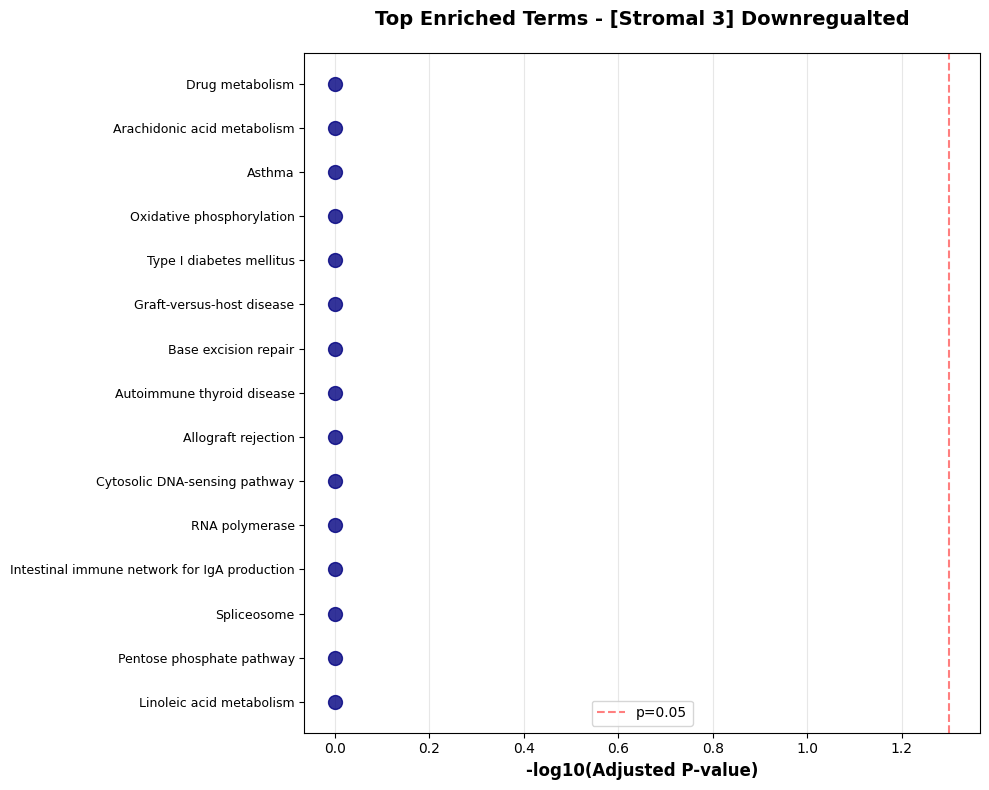

In [28]:
# Select top terms
top_n = 15
top_terms = enr_down.results.head(top_n).copy()
top_terms = top_terms.sort_values('Adjusted P-value', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Data
y_pos = np.arange(len(top_terms))
pvals = -np.log10(top_terms['Adjusted P-value'])

# Create lollipop
ax.hlines(y=y_pos, xmin=0, xmax=pvals, color='skyblue', alpha=0.7, linewidth=3)
ax.plot(pvals, y_pos, "o", markersize=10, color='navy', alpha=0.8)

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(top_terms['Term'], fontsize=9)
ax.set_xlabel('-log10(Adjusted P-value)', fontsize=12, fontweight='bold')
ax.set_title('Top Enriched Terms - [Stromal 3] Downregualted', 
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=-np.log10(0.05), color='red', linestyle='--', 
           label='p=0.05', alpha=0.5)
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('enrichment_lollipop.png', dpi=300, bbox_inches='tight')
plt.show()